In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from meteo_pkg.loader import MeteoLoader

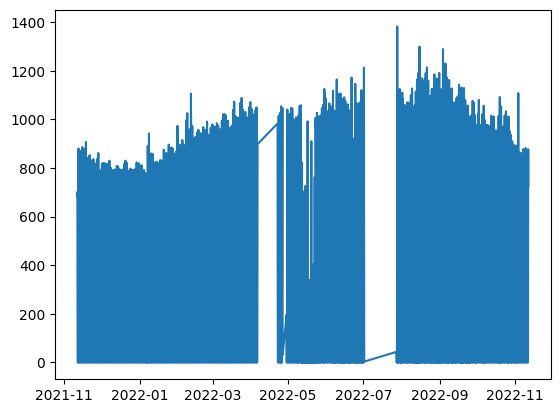

In [2]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
plt.plot(df.index, df["Ig"])
plt.show()

In [3]:
df["hora"] = df.index.dt.time

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [4]:
df["fecha"] = df.index.date
df["hora"] = df.index.floor("h").strftime("%H:%M")

pivot_df = df.pivot(index="hora", columns="fecha", values="Ig")

ValueError: Index contains duplicate entries, cannot reshape

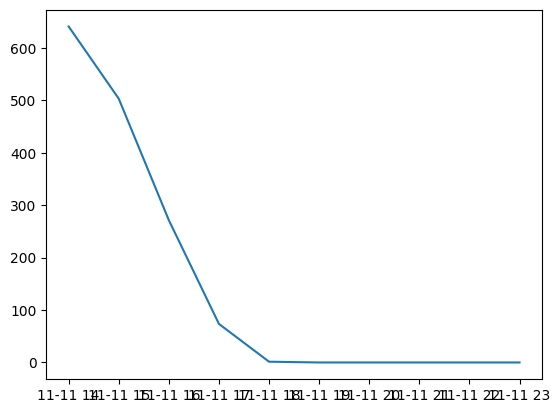

In [5]:
df["hora"] = df.index.floor("h")

pivot_df = df.groupby(["fecha", "hora"])["Ig"].mean().reset_index().pivot(
    index="hora", columns="fecha", values="Ig"
)

plt.plot(pivot_df.index, pivot_df.iloc[:,0])
plt.show() 

In [6]:
def grafica_dias_superpuestos(df, columna, regresar_df=False):

    tabla = df.copy()
    tabla["fecha"] = tabla.index.date
    tabla["hora"] = pd.Series(tabla.index.floor("h"), index=tabla.index).dt.strftime("%H:%M") #antes de esta linea se hacia una grafica horrible.
    
    tabla_agg = tabla.groupby(["fecha", "hora"])[columna].mean().reset_index() #me salia el error de que habia duplicados

    pivot_df = tabla_agg.pivot(index="hora", columns="fecha", values=columna) #pivote
    pivot_df = pivot_df.sort_index()

    plt.figure(figsize=(12, 6))
    for day in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[day], alpha=0.1, lw=1,c='black')
    plt.xlabel("Hora del día")
    plt.ylabel(columna)
    plt.title("Serie temporal superpuesta por día")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    if regresar_df:
        return pivot_df

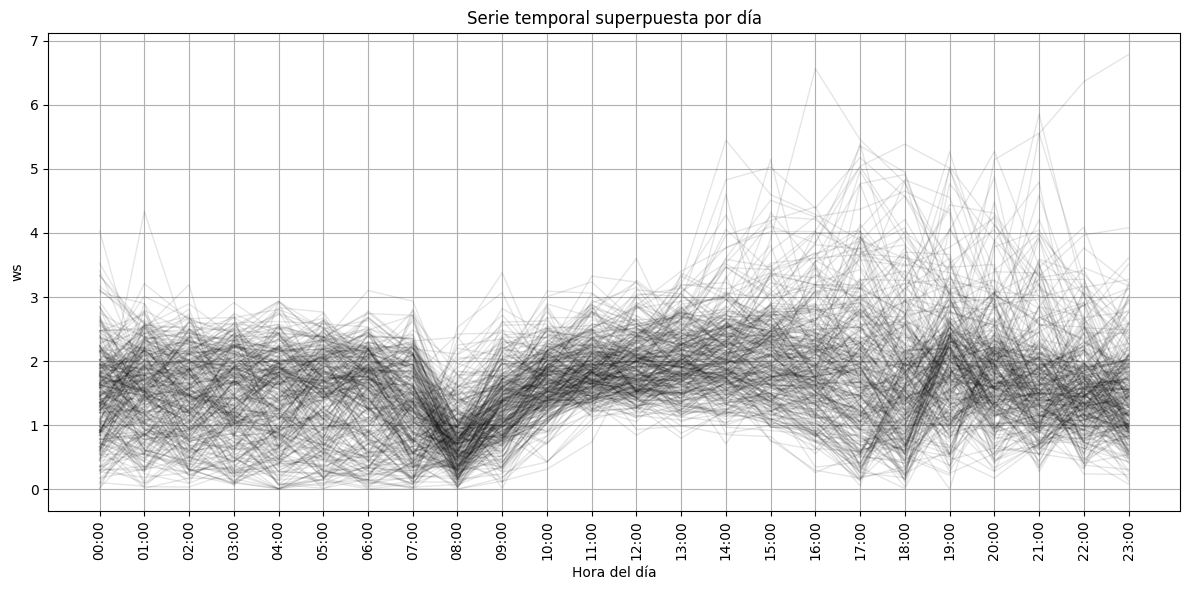

In [8]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
grafica_dias_superpuestos(df, "ws")

### La hora se redondea a hora completa y se convierte en texto HH:MM.
### Agrupamiento por día y hora
Se obtiene el promedio de la columna seleccionada para evitar duplicados.
### Construcción de una tabla pivote con:
Índice → horas del día
Columnas → fechas
Valores → mediciones de la columna seleccionada